# Phase 5: Model Training & Evaluation

**Objectives:**
1. Train baseline model (Linear Regression)
2. Train advanced models (Random Forest, XGBoost, Gradient Boosting)
3. Evaluate using regression metrics (R², RMSE, MAE, MAPE)
4. Cross-validation for robust evaluation
5. Hyperparameter tuning
6. Feature importance analysis
7. Residual analysis
8. Select best model

## 5.1 Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import time

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

# Visualization settings
TITLE_SIZE = 16
AXIS_LABEL_SIZE = 13
TICK_SIZE = 11
LEGEND_SIZE = 11
COLOR_GOOD = '#2ecc71'
COLOR_BAD = '#e74c3c'
COLOR_NEUTRAL = '#3498db'

In [1]:
import sklearn
print(sklearn.__version__)


1.5.1


## 5.2 Load Preprocessed Data

In [2]:
# Load processed data
X_train = np.load('X_train_processed.npy')
X_test = np.load('X_test_processed.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

# Load feature names
feature_names = joblib.load('feature_names.pkl')

print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")
print(f"Features: {len(feature_names)}")

X_train: (8290, 31)
X_test: (2073, 31)
y_train: (8290,)
y_test: (2073,)
Features: 31


## 5.3 Define Evaluation Metrics

In [3]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """
    Evaluate model and return metrics dictionary.
    """
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Metrics
    metrics = {
        'Model': model_name,
        'Train_R2': r2_score(y_train, y_train_pred),
        'Test_R2': r2_score(y_test, y_test_pred),
        'Train_RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'Test_RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'Train_MAE': mean_absolute_error(y_train, y_train_pred),
        'Test_MAE': mean_absolute_error(y_test, y_test_pred),
        'Test_MAPE': np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
    }
    
    return metrics, y_test_pred

def print_metrics(metrics):
    """
    Print metrics in a formatted way.
    """
    print(f"\n{'='*50}")
    print(f"Model: {metrics['Model']}")
    print(f"{'='*50}")
    print(f"{'Metric':<15} {'Train':<15} {'Test':<15}")
    print(f"{'-'*45}")
    print(f"{'R²':<15} {metrics['Train_R2']:<15.4f} {metrics['Test_R2']:<15.4f}")
    print(f"{'RMSE':<15} {metrics['Train_RMSE']:<15.2f} {metrics['Test_RMSE']:<15.2f}")
    print(f"{'MAE':<15} {metrics['Train_MAE']:<15.2f} {metrics['Test_MAE']:<15.2f}")
    print(f"{'MAPE':<15} {'-':<15} {metrics['Test_MAPE']:<15.2f}%")

In [4]:
# Store all results
all_results = []
all_predictions = {}

---
## 5.4 Baseline Model: Linear Regression

In [5]:
# Train Linear Regression
lr_model = LinearRegression()

start_time = time.time()
lr_model.fit(X_train, y_train)
train_time = time.time() - start_time

# Evaluate
lr_metrics, lr_pred = evaluate_model(lr_model, X_train, X_test, y_train, y_test, 'Linear Regression')
lr_metrics['Train_Time'] = train_time

print_metrics(lr_metrics)
print(f"\nTraining time: {train_time:.2f} seconds")

all_results.append(lr_metrics)
all_predictions['Linear Regression'] = lr_pred


Model: Linear Regression
Metric          Train           Test           
---------------------------------------------
R²              0.7150          0.7026         
RMSE            2176.90         2196.35        
MAE             1619.11         1631.82        
MAPE            -               20.39          %

Training time: 0.04 seconds


In [6]:
# Cross-validation for Linear Regression
cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean CV R²: {cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f})")

Cross-Validation R² Scores: [0.72294312 0.70238808 0.73345596 0.69821665 0.70704583]
Mean CV R²: 0.7128 (+/- 0.0266)


---
## 5.5 Ridge Regression

In [7]:
# Train Ridge Regression
ridge_model = Ridge(alpha=1.0, random_state=42)

start_time = time.time()
ridge_model.fit(X_train, y_train)
train_time = time.time() - start_time

# Evaluate
ridge_metrics, ridge_pred = evaluate_model(ridge_model, X_train, X_test, y_train, y_test, 'Ridge Regression')
ridge_metrics['Train_Time'] = train_time

print_metrics(ridge_metrics)

all_results.append(ridge_metrics)
all_predictions['Ridge Regression'] = ridge_pred


Model: Ridge Regression
Metric          Train           Test           
---------------------------------------------
R²              0.7148          0.7026         
RMSE            2177.45         2196.52        
MAE             1620.34         1632.56        
MAPE            -               20.40          %


---
## 5.6 Random Forest Regressor

In [8]:
# Train Random Forest (default parameters first)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

start_time = time.time()
rf_model.fit(X_train, y_train)
train_time = time.time() - start_time

# Evaluate
rf_metrics, rf_pred = evaluate_model(rf_model, X_train, X_test, y_train, y_test, 'Random Forest')
rf_metrics['Train_Time'] = train_time

print_metrics(rf_metrics)
print(f"\nTraining time: {train_time:.2f} seconds")

all_results.append(rf_metrics)
all_predictions['Random Forest'] = rf_pred


Model: Random Forest
Metric          Train           Test           
---------------------------------------------
R²              0.9850          0.9150         
RMSE            498.60          1174.01        
MAE             251.65          619.75         
MAPE            -               7.31           %

Training time: 0.19 seconds


In [9]:
# Cross-validation for Random Forest
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-Validation R² Scores: {cv_scores_rf}")
print(f"Mean CV R²: {cv_scores_rf.mean():.4f} (+/- {cv_scores_rf.std()*2:.4f})")

Cross-Validation R² Scores: [0.90379377 0.90346201 0.9214008  0.91346557 0.90999018]
Mean CV R²: 0.9104 (+/- 0.0133)


---
## 5.7 Gradient Boosting Regressor

In [10]:
# Train Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

start_time = time.time()
gb_model.fit(X_train, y_train)
train_time = time.time() - start_time

# Evaluate
gb_metrics, gb_pred = evaluate_model(gb_model, X_train, X_test, y_train, y_test, 'Gradient Boosting')
gb_metrics['Train_Time'] = train_time

print_metrics(gb_metrics)
print(f"\nTraining time: {train_time:.2f} seconds")

all_results.append(gb_metrics)
all_predictions['Gradient Boosting'] = gb_pred


Model: Gradient Boosting
Metric          Train           Test           
---------------------------------------------
R²              0.8441          0.8231         
RMSE            1609.91         1693.90        
MAE             1151.60         1191.97        
MAPE            -               14.79          %

Training time: 0.55 seconds


---
## 5.8 XGBoost Regressor

In [11]:
# Train XGBoost
xgb_model = XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1, verbosity=0)

start_time = time.time()
xgb_model.fit(X_train, y_train)
train_time = time.time() - start_time

# Evaluate
xgb_metrics, xgb_pred = evaluate_model(xgb_model, X_train, X_test, y_train, y_test, 'XGBoost')
xgb_metrics['Train_Time'] = train_time

print_metrics(xgb_metrics)
print(f"\nTraining time: {train_time:.2f} seconds")

all_results.append(xgb_metrics)
all_predictions['XGBoost'] = xgb_pred


Model: XGBoost
Metric          Train           Test           
---------------------------------------------
R²              0.9681          0.9117         
RMSE            728.29          1196.52        
MAE             469.95          729.91         
MAPE            -               8.72           %

Training time: 0.07 seconds


In [12]:
# Cross-validation for XGBoost
cv_scores_xgb = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-Validation R² Scores: {cv_scores_xgb}")
print(f"Mean CV R²: {cv_scores_xgb.mean():.4f} (+/- {cv_scores_xgb.std()*2:.4f})")

Cross-Validation R² Scores: [0.91539544 0.9073146  0.92958641 0.92804468 0.91272163]
Mean CV R²: 0.9186 (+/- 0.0175)


---
## 5.9 Model Comparison

In [13]:
# Create comparison DataFrame
results_df = pd.DataFrame(all_results)
results_df = results_df.sort_values('Test_R2', ascending=False).reset_index(drop=True)
results_df

,Model,Train_R2,Test_R2,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE,Test_MAPE,Train_Time
0,Random Forest,0.985048,0.915030,498.595278,1174.010760,251.645080,619.747987,7.306988,0.190608
1,XGBoost,0.968098,0.911741,728.287935,1196.515695,469.948386,729.907784,8.724783,0.065496
2,Gradient Boosting,0.844114,0.823114,1609.908714,1693.895273,1151.603198,1191.968490,14.793005,0.548374
3,Linear Regression,0.714975,0.702611,2176.901514,2196.353598,1619.106930,1631.822112,20.388120,0.041246
4,Ridge Regression,0.714831,0.702567,2177.451637,2196.517832,1620.339773,1632.563630,20.396564,0.015313


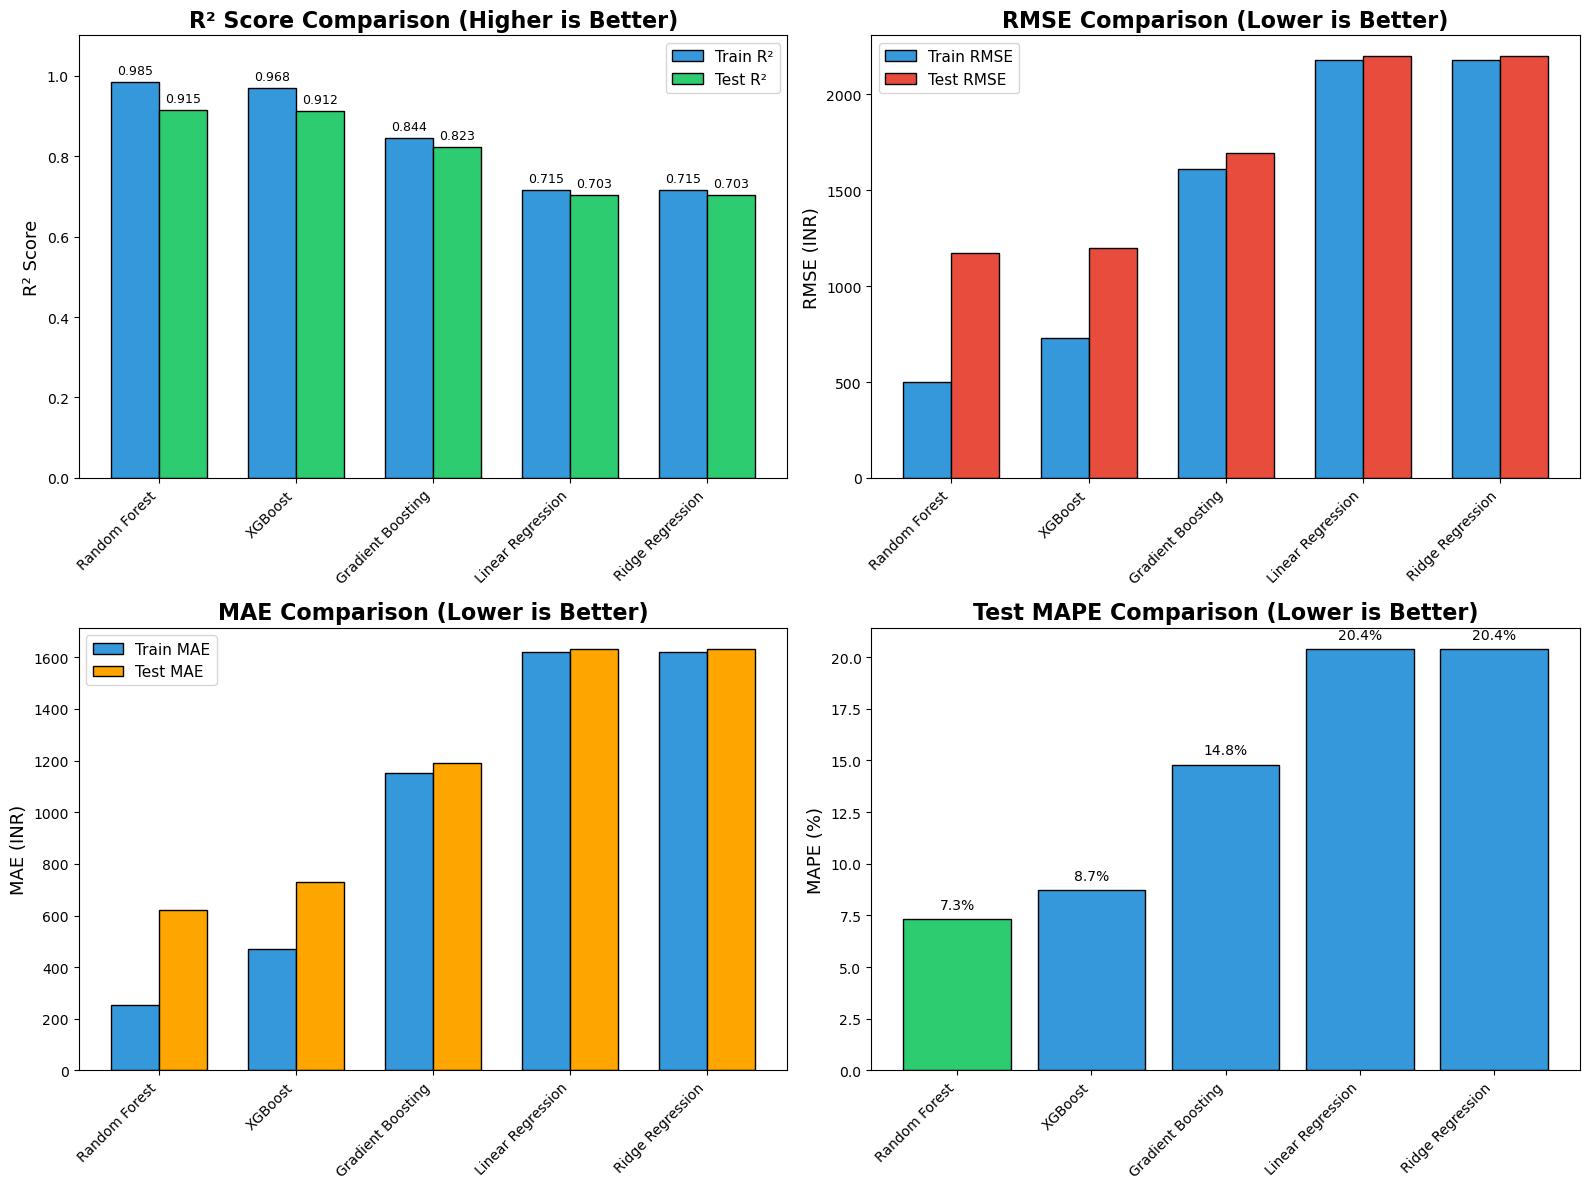

In [14]:
# Visualization: Model Comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

models = results_df['Model'].tolist()
x_pos = range(len(models))

# R² Comparison
ax = axes[0, 0]
width = 0.35
ax.bar([x - width/2 for x in x_pos], results_df['Train_R2'], width, label='Train R²', color=COLOR_NEUTRAL, edgecolor='black')
ax.bar([x + width/2 for x in x_pos], results_df['Test_R2'], width, label='Test R²', color=COLOR_GOOD, edgecolor='black')
ax.set_xticks(x_pos)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.set_ylabel('R² Score', fontsize=AXIS_LABEL_SIZE)
ax.set_title('R² Score Comparison (Higher is Better)', fontsize=TITLE_SIZE, fontweight='bold')
ax.legend(fontsize=LEGEND_SIZE)
ax.set_ylim(0, 1.1)
for i, (train, test) in enumerate(zip(results_df['Train_R2'], results_df['Test_R2'])):
    ax.text(i - width/2, train + 0.02, f'{train:.3f}', ha='center', fontsize=9)
    ax.text(i + width/2, test + 0.02, f'{test:.3f}', ha='center', fontsize=9)

# RMSE Comparison
ax = axes[0, 1]
ax.bar([x - width/2 for x in x_pos], results_df['Train_RMSE'], width, label='Train RMSE', color=COLOR_NEUTRAL, edgecolor='black')
ax.bar([x + width/2 for x in x_pos], results_df['Test_RMSE'], width, label='Test RMSE', color=COLOR_BAD, edgecolor='black')
ax.set_xticks(x_pos)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.set_ylabel('RMSE (INR)', fontsize=AXIS_LABEL_SIZE)
ax.set_title('RMSE Comparison (Lower is Better)', fontsize=TITLE_SIZE, fontweight='bold')
ax.legend(fontsize=LEGEND_SIZE)

# MAE Comparison
ax = axes[1, 0]
ax.bar([x - width/2 for x in x_pos], results_df['Train_MAE'], width, label='Train MAE', color=COLOR_NEUTRAL, edgecolor='black')
ax.bar([x + width/2 for x in x_pos], results_df['Test_MAE'], width, label='Test MAE', color='orange', edgecolor='black')
ax.set_xticks(x_pos)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.set_ylabel('MAE (INR)', fontsize=AXIS_LABEL_SIZE)
ax.set_title('MAE Comparison (Lower is Better)', fontsize=TITLE_SIZE, fontweight='bold')
ax.legend(fontsize=LEGEND_SIZE)

# MAPE Comparison
ax = axes[1, 1]
colors = [COLOR_GOOD if x == results_df['Test_MAPE'].min() else COLOR_NEUTRAL for x in results_df['Test_MAPE']]
bars = ax.bar(x_pos, results_df['Test_MAPE'], color=colors, edgecolor='black')
ax.set_xticks(x_pos)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.set_ylabel('MAPE (%)', fontsize=AXIS_LABEL_SIZE)
ax.set_title('Test MAPE Comparison (Lower is Better)', fontsize=TITLE_SIZE, fontweight='bold')
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.5, f'{height:.1f}%', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

---
## 5.10 Hyperparameter Tuning (Best Model)

In [15]:
# Identify best model based on Test R²
best_model_name = results_df.loc[0, 'Model']
print(f"Best performing model: {best_model_name}")
print(f"Test R²: {results_df.loc[0, 'Test_R2']:.4f}")

Best performing model: Random Forest
Test R²: 0.9150


In [16]:
# Hyperparameter tuning for Random Forest (typically best for this type of data)
print("Tuning Random Forest...")

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

rf_random = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42, n_jobs=-1),
    param_distributions=rf_param_grid,
    n_iter=20,
    cv=5,
    scoring='r2',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

start_time = time.time()
rf_random.fit(X_train, y_train)
tuning_time = time.time() - start_time

print(f"\nTuning time: {tuning_time:.2f} seconds")
print(f"Best parameters: {rf_random.best_params_}")
print(f"Best CV R²: {rf_random.best_score_:.4f}")

Tuning Random Forest...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Tuning time: 13.76 seconds
Best parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 20}
Best CV R²: 0.9115


In [17]:
# Evaluate tuned Random Forest
rf_tuned = rf_random.best_estimator_

rf_tuned_metrics, rf_tuned_pred = evaluate_model(rf_tuned, X_train, X_test, y_train, y_test, 'Random Forest (Tuned)')
print_metrics(rf_tuned_metrics)

all_results.append(rf_tuned_metrics)
all_predictions['Random Forest (Tuned)'] = rf_tuned_pred


Model: Random Forest (Tuned)
Metric          Train           Test           
---------------------------------------------
R²              0.9853          0.9155         
RMSE            495.00          1170.49        
MAE             252.94          619.15         
MAPE            -               7.30           %


In [18]:
# Hyperparameter tuning for XGBoost
print("Tuning XGBoost...")

xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

xgb_random = RandomizedSearchCV(
    estimator=XGBRegressor(random_state=42, n_jobs=-1, verbosity=0),
    param_distributions=xgb_param_grid,
    n_iter=20,
    cv=5,
    scoring='r2',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

start_time = time.time()
xgb_random.fit(X_train, y_train)
tuning_time = time.time() - start_time

print(f"\nTuning time: {tuning_time:.2f} seconds")
print(f"Best parameters: {xgb_random.best_params_}")
print(f"Best CV R²: {xgb_random.best_score_:.4f}")

Tuning XGBoost...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Tuning time: 3.67 seconds
Best parameters: {'subsample': 0.9, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Best CV R²: 0.9228


In [19]:
# Evaluate tuned XGBoost
xgb_tuned = xgb_random.best_estimator_

xgb_tuned_metrics, xgb_tuned_pred = evaluate_model(xgb_tuned, X_train, X_test, y_train, y_test, 'XGBoost (Tuned)')
print_metrics(xgb_tuned_metrics)

all_results.append(xgb_tuned_metrics)
all_predictions['XGBoost (Tuned)'] = xgb_tuned_pred


Model: XGBoost (Tuned)
Metric          Train           Test           
---------------------------------------------
R²              0.9773          0.9179         
RMSE            613.76          1153.93        
MAE             393.47          680.40         
MAPE            -               8.15           %


---
## 5.11 Final Model Comparison

In [20]:
# Updated comparison
final_results_df = pd.DataFrame(all_results)
final_results_df = final_results_df.sort_values('Test_R2', ascending=False).reset_index(drop=True)
final_results_df[['Model', 'Test_R2', 'Test_RMSE', 'Test_MAE', 'Test_MAPE']]

,Model,Test_R2,Test_RMSE,Test_MAE,Test_MAPE
0,XGBoost (Tuned),0.917912,1153.929024,680.404736,8.151870
1,Random Forest (Tuned),0.915539,1170.489250,619.147581,7.300900
2,Random Forest,0.915030,1174.010760,619.747987,7.306988
3,XGBoost,0.911741,1196.515695,729.907784,8.724783
4,Gradient Boosting,0.823114,1693.895273,1191.968490,14.793005
5,Linear Regression,0.702611,2196.353598,1631.822112,20.388120
6,Ridge Regression,0.702567,2196.517832,1632.563630,20.396564


In [21]:
# Select best model
best_model_name = final_results_df.loc[0, 'Model']
best_test_r2 = final_results_df.loc[0, 'Test_R2']

print(f"\n{'='*50}")
print(f"BEST MODEL: {best_model_name}")
print(f"{'='*50}")
print(f"Test R²: {best_test_r2:.4f}")
print(f"Test RMSE: ₹{final_results_df.loc[0, 'Test_RMSE']:,.0f}")
print(f"Test MAE: ₹{final_results_df.loc[0, 'Test_MAE']:,.0f}")
print(f"Test MAPE: {final_results_df.loc[0, 'Test_MAPE']:.2f}%")


BEST MODEL: XGBoost (Tuned)
Test R²: 0.9179
Test RMSE: ₹1,154
Test MAE: ₹680
Test MAPE: 8.15%


---
## 5.12 Feature Importance

In [22]:
# Get best model for feature importance
if 'XGBoost' in best_model_name:
    best_model = xgb_tuned if 'Tuned' in best_model_name else xgb_model
elif 'Random Forest' in best_model_name:
    best_model = rf_tuned if 'Tuned' in best_model_name else rf_model
else:
    best_model = rf_tuned  # Use tuned RF as default for feature importance

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': best_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("Top 15 Important Features:")
feature_importance.head(15)

Top 15 Important Features:


,Feature,Importance
10,Airline_Jet Airways,0.196686
27,Additional_Info_In-flight meal not included,0.152025
0,Duration_Minutes,0.115556
11,Airline_Multiple carriers,0.077315
1,Stops,0.061282
25,Destination_New Delhi,0.046696
19,Source_Kolkata,0.032223
3,Journey_Month,0.031251
13,Airline_SpiceJet,0.030638
12,Airline_Multiple carriers Premium economy,0.029807


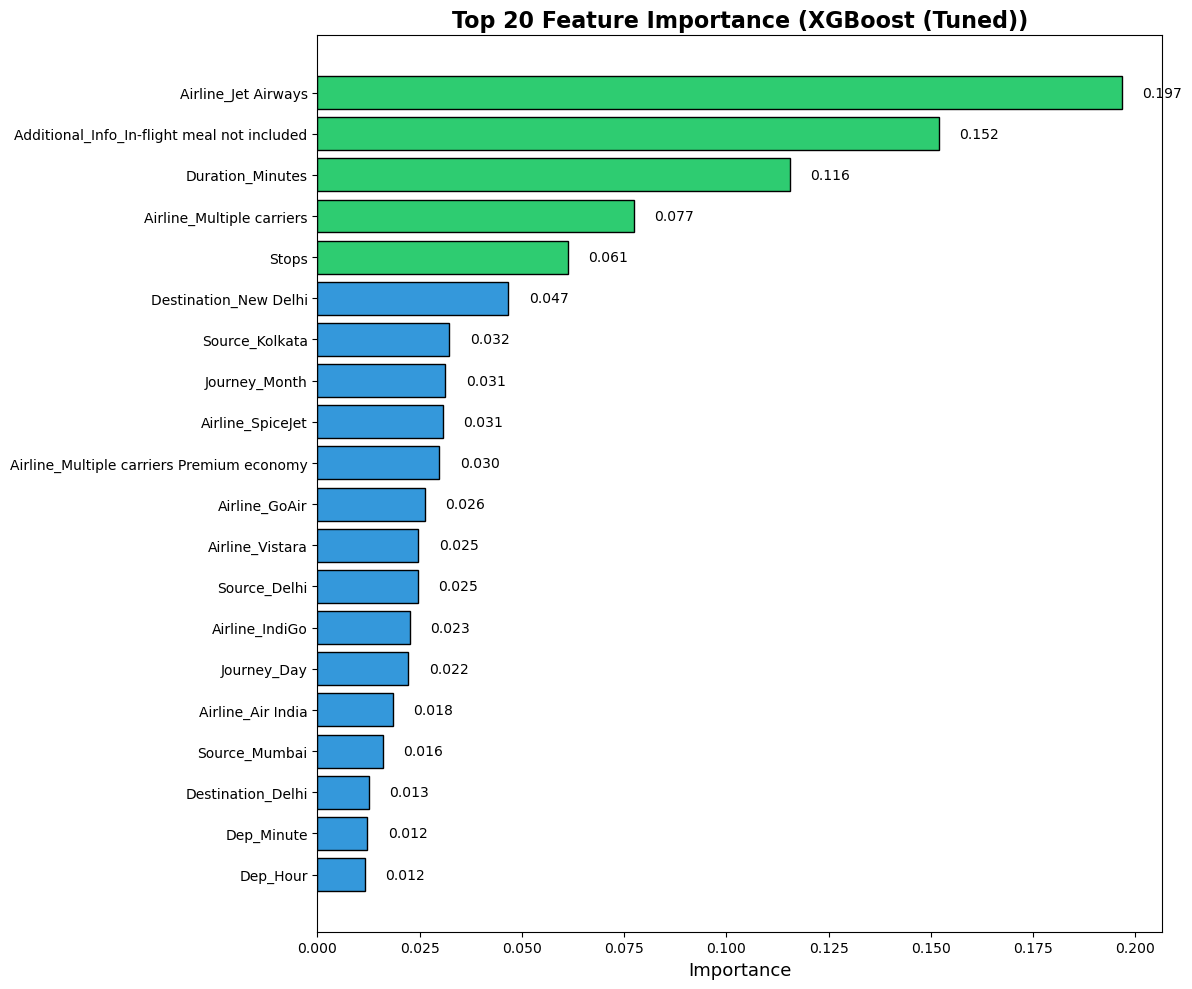

In [23]:
# Visualize feature importance
fig, ax = plt.subplots(figsize=(12, 10))

top_n = 20
top_features = feature_importance.head(top_n)

colors = [COLOR_GOOD if i < 5 else COLOR_NEUTRAL for i in range(top_n)]
bars = ax.barh(range(top_n), top_features['Importance'].values, color=colors, edgecolor='black')
ax.set_yticks(range(top_n))
ax.set_yticklabels(top_features['Feature'].values)
ax.invert_yaxis()
ax.set_xlabel('Importance', fontsize=AXIS_LABEL_SIZE)
ax.set_title(f'Top {top_n} Feature Importance ({best_model_name})', fontsize=TITLE_SIZE, fontweight='bold')

# Add value labels
for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.005, bar.get_y() + bar.get_height()/2., f'{width:.3f}', 
            va='center', fontsize=10)

plt.tight_layout()
plt.show()

---
## 5.13 Residual Analysis

In [24]:
# Get predictions from best model
best_pred = all_predictions[best_model_name]
residuals = y_test - best_pred

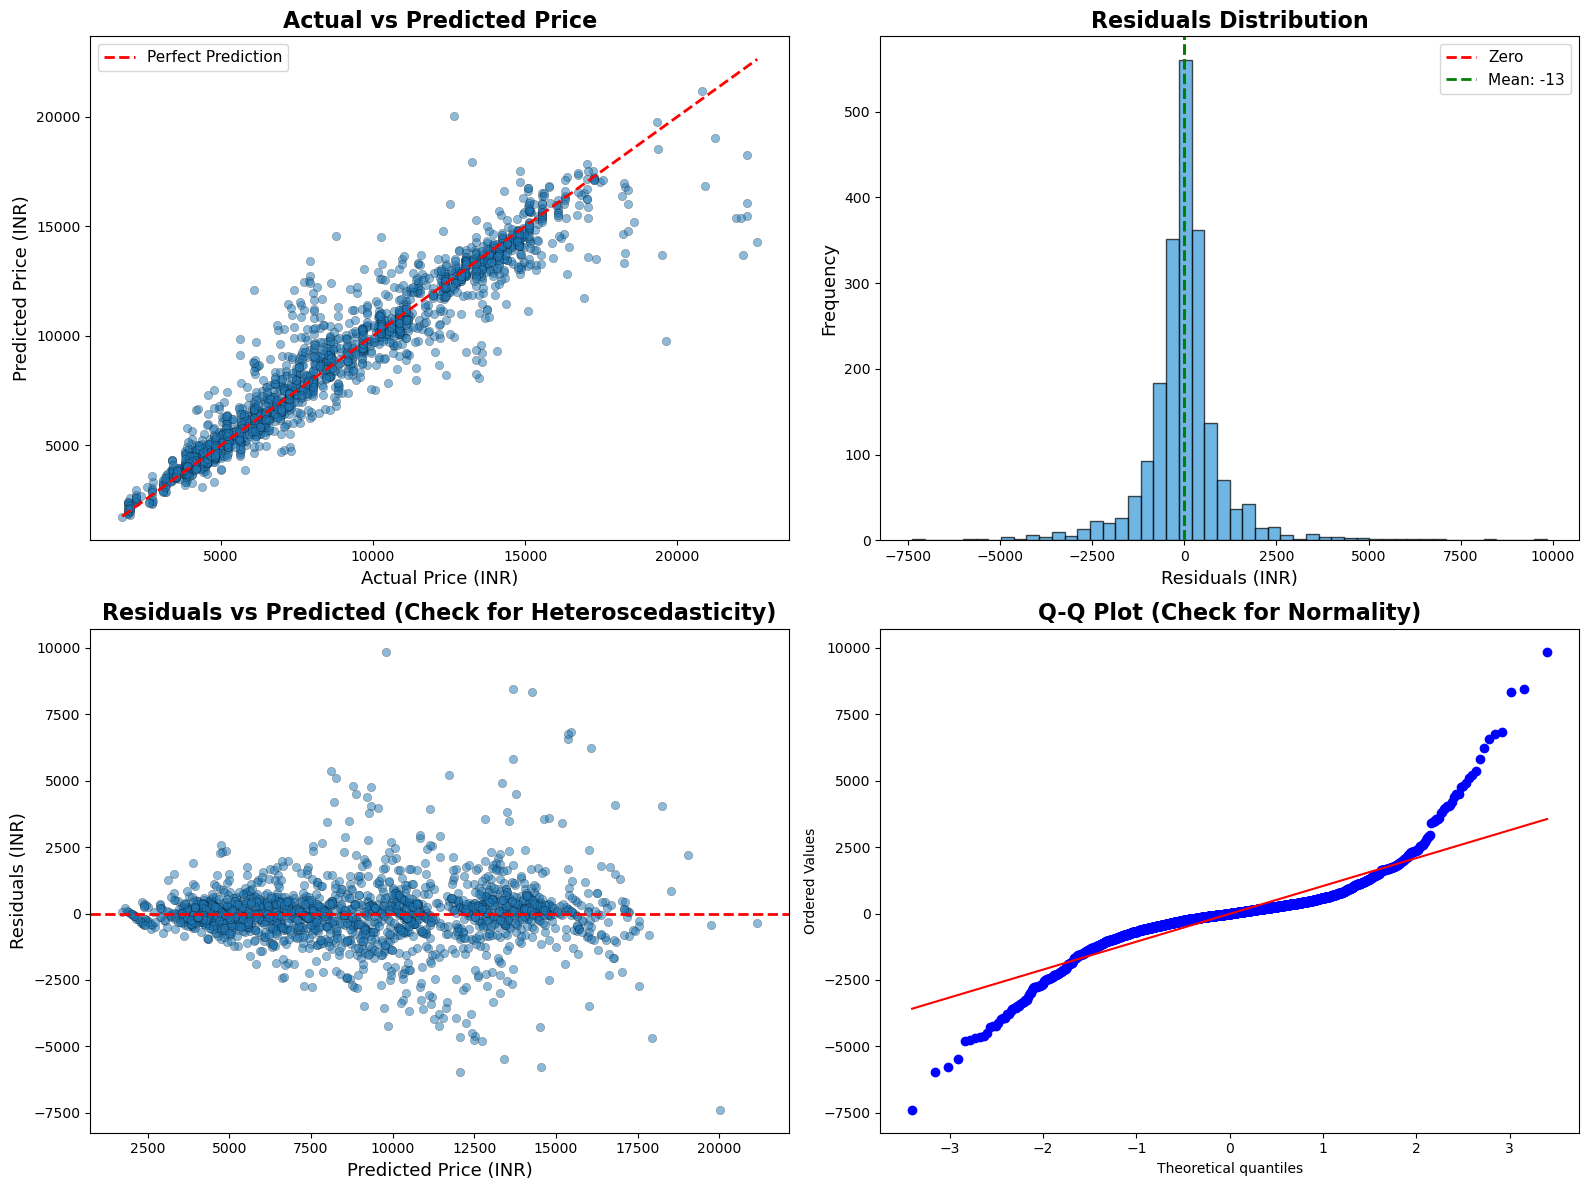

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Actual vs Predicted
ax = axes[0, 0]
ax.scatter(y_test, best_pred, alpha=0.5, edgecolors='black', linewidth=0.3)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label='Perfect Prediction')
ax.set_xlabel('Actual Price (INR)', fontsize=AXIS_LABEL_SIZE)
ax.set_ylabel('Predicted Price (INR)', fontsize=AXIS_LABEL_SIZE)
ax.set_title('Actual vs Predicted Price', fontsize=TITLE_SIZE, fontweight='bold')
ax.legend(fontsize=LEGEND_SIZE)

# 2. Residuals Distribution
ax = axes[0, 1]
ax.hist(residuals, bins=50, edgecolor='black', alpha=0.7, color=COLOR_NEUTRAL)
ax.axvline(0, color='red', linestyle='--', linewidth=2, label='Zero')
ax.axvline(residuals.mean(), color='green', linestyle='--', linewidth=2, label=f'Mean: {residuals.mean():.0f}')
ax.set_xlabel('Residuals (INR)', fontsize=AXIS_LABEL_SIZE)
ax.set_ylabel('Frequency', fontsize=AXIS_LABEL_SIZE)
ax.set_title('Residuals Distribution', fontsize=TITLE_SIZE, fontweight='bold')
ax.legend(fontsize=LEGEND_SIZE)

# 3. Residuals vs Predicted
ax = axes[1, 0]
ax.scatter(best_pred, residuals, alpha=0.5, edgecolors='black', linewidth=0.3)
ax.axhline(0, color='red', linestyle='--', linewidth=2)
ax.set_xlabel('Predicted Price (INR)', fontsize=AXIS_LABEL_SIZE)
ax.set_ylabel('Residuals (INR)', fontsize=AXIS_LABEL_SIZE)
ax.set_title('Residuals vs Predicted (Check for Heteroscedasticity)', fontsize=TITLE_SIZE, fontweight='bold')

# 4. Q-Q Plot
ax = axes[1, 1]
from scipy import stats
stats.probplot(residuals, dist="norm", plot=ax)
ax.set_title('Q-Q Plot (Check for Normality)', fontsize=TITLE_SIZE, fontweight='bold')

plt.tight_layout()
plt.show()

In [26]:
# Residual statistics
print("Residual Statistics:")
print(f"  Mean: ₹{residuals.mean():,.2f}")
print(f"  Std: ₹{residuals.std():,.2f}")
print(f"  Min: ₹{residuals.min():,.2f}")
print(f"  Max: ₹{residuals.max():,.2f}")

Residual Statistics:
  Mean: ₹-12.82
  Std: ₹1,153.86
  Min: ₹-7,385.36
  Max: ₹9,848.42


---
## 5.14 Save Best Model

In [27]:
# Save best model
joblib.dump(best_model, 'best_model.pkl')
print(f"Best model saved to 'best_model.pkl'")

# Save model name
with open('best_model_name.txt', 'w') as f:
    f.write(best_model_name)
print(f"Model name saved to 'best_model_name.txt'")

Best model saved to 'best_model.pkl'
Model name saved to 'best_model_name.txt'


---
## 5.15 Phase 5 Summary (Upload This Output)

In [ ]:
print("="*70)
print("PHASE 5: MODEL TRAINING & EVALUATION SUMMARY")
print("="*70)

print("\n1. MODELS TRAINED")
for i, row in final_results_df.iterrows():
    print(f"   {i+1}. {row['Model']}")

print("\n2. MODEL COMPARISON (Sorted by Test R²)")
print(f"   {'Model':<25} {'Test R²':<12} {'Test RMSE':<12} {'Test MAE':<12} {'MAPE'}")
print(f"   {'-'*65}")
for i, row in final_results_df.iterrows():
    print(f"   {row['Model']:<25} {row['Test_R2']:<12.4f} {row['Test_RMSE']:<12,.0f} {row['Test_MAE']:<12,.0f} {row['Test_MAPE']:.2f}%")

print(f"\n3. BEST MODEL: {best_model_name}")
print(f"   Test R²: {final_results_df.loc[0, 'Test_R2']:.4f}")
print(f"   Test RMSE: ₹{final_results_df.loc[0, 'Test_RMSE']:,.0f}")
print(f"   Test MAE: ₹{final_results_df.loc[0, 'Test_MAE']:,.0f}")
print(f"   Test MAPE: {final_results_df.loc[0, 'Test_MAPE']:.2f}%")

print("\n4. TOP 5 IMPORTANT FEATURES")
for i, row in feature_importance.head(5).iterrows():
    print(f"   {feature_importance.index.get_loc(i)+1}. {row['Feature']}: {row['Importance']:.4f}")

print("\n5. RESIDUAL ANALYSIS")
print(f"   Mean Residual: ₹{residuals.mean():,.2f}")
print(f"   Std Residual: ₹{residuals.std():,.2f}")

print("\n6. SAVED ARTIFACTS")
print("   - best_model.pkl")
print("   - best_model_name.txt")

print("\n7. MODEL INTERPRETATION")
r2 = final_results_df.loc[0, 'Test_R2']
mape = final_results_df.loc[0, 'Test_MAPE']
print(f"   - Model explains {r2*100:.1f}% of price variance")
print(f"   - Average prediction error: {mape:.1f}%")
print(f"   - Typical prediction within ₹{final_results_df.loc[0, 'Test_MAE']:,.0f} of actual")



PHASE 5: MODEL TRAINING & EVALUATION SUMMARY

1. MODELS TRAINED
   1. XGBoost (Tuned)
   2. Random Forest (Tuned)
   3. Random Forest
   4. XGBoost
   5. Gradient Boosting
   6. Linear Regression
   7. Ridge Regression

2. MODEL COMPARISON (Sorted by Test R²)
   Model                     Test R²      Test RMSE    Test MAE     MAPE
   -----------------------------------------------------------------
   XGBoost (Tuned)           0.9179       1,154        680          8.15%
   Random Forest (Tuned)     0.9155       1,170        619          7.30%
   Random Forest             0.9150       1,174        620          7.31%
   XGBoost                   0.9117       1,197        730          8.72%
   Gradient Boosting         0.8231       1,694        1,192        14.79%
   Linear Regression         0.7026       2,196        1,632        20.39%
   Ridge Regression          0.7026       2,197        1,633        20.40%

3. BEST MODEL: XGBoost (Tuned)
   Test R²: 0.9179
   Test RMSE: ₹1,154
   Te